## Import various libraries

In [1]:
%load_ext lab_black

In [9]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf, DictConfig
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
import matplotlib_functions as mympf
from Data import Data_eval
import model_eval
import models.reg as rm

mympf.setMatplotlibParam()
plt.viridis()



<Figure size 1920x1440 with 0 Axes>

### Modify dir_res to where the weights of the CNN model are stored

In [ ]:
dir_res = "/cerea_raid/users/dumontj/dev/coco2/test/weights"

## Dataset and model choice
* #### name_model = weights of the selected trained CNN 
* #### path_eval_nc = path to the netcdf file used for evaluating the results

In [10]:
name_model = os.path.join(dir_res, "lip_with_no2")
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/train_dataset.nc"

#### Get dataset, weights

In [11]:
data = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_eval_nc,
)

model = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model), name_w="w_best.h5"
)

#### Make emission predictions, then compute absolute (MAE) and relative (MAPE) metrics 

In [12]:
metrics = model_eval.get_inv_metrics_model_on_data(model, data)
print("mae:", np.mean(metrics["mae"]))
print("mape:", np.mean(metrics["mape"]))

2023-06-27 15:49:37.809422: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-06-27 15:49:38.493791: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 3s 5ms/step
mae: 3.181809
mape: 21.941608


197/197 [==============================] - 1s 4ms/step


<Figure size 1920x1440 with 0 Axes>

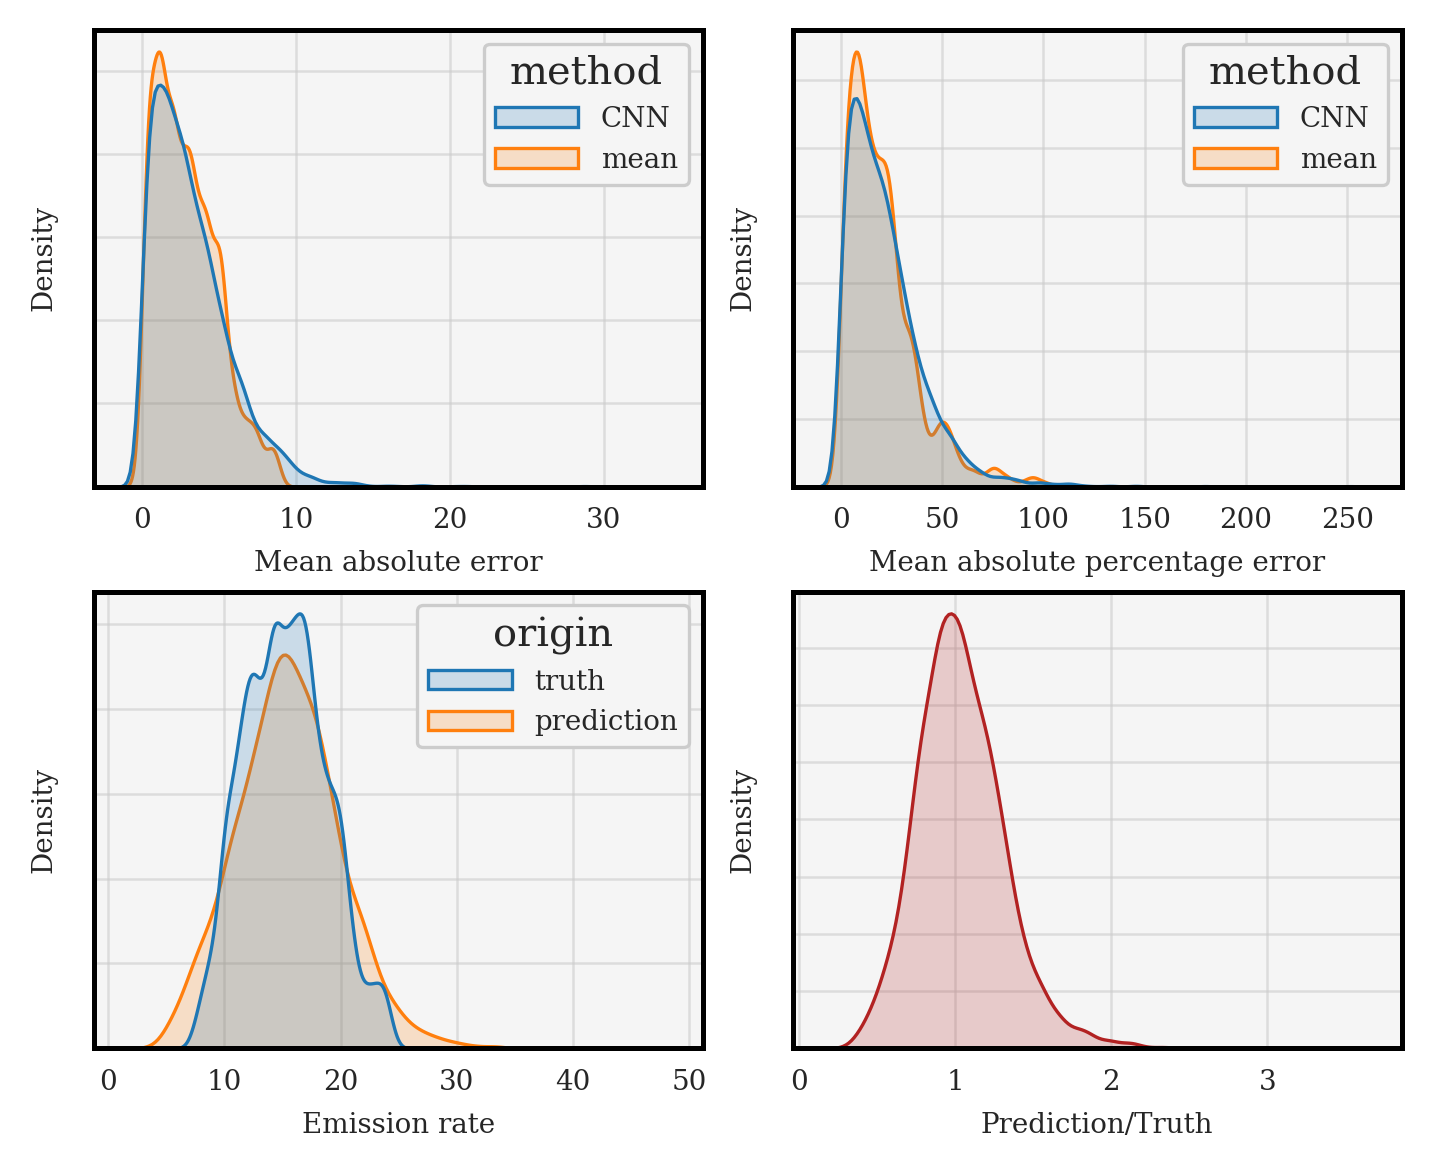

In [13]:
model_eval.get_summary_histo_inversion(model, data)

nwbce: 2.5828514099121094
idx: 4787
origin: smart_2km_Lip_64
time: 2015-09-29T11:00:00.000000000
emiss: [18.57218 18.72539 16.57713]

nwbce: 2.7903671264648438
idx: 5727
origin: smart_2km_Lip_64
time: 2015-11-23T15:00:00.000000000
emiss: [18.91706 19.25123 20.25529]

nwbce: 2.6440963745117188
idx: 952
origin: smart_2km_Lip_64
time: 2015-02-25T16:00:00.000000000
emiss: [21.45722 22.23677 22.82182]

1/1 [==============================] - 0s 18ms/step


<Figure size 1920x1440 with 0 Axes>

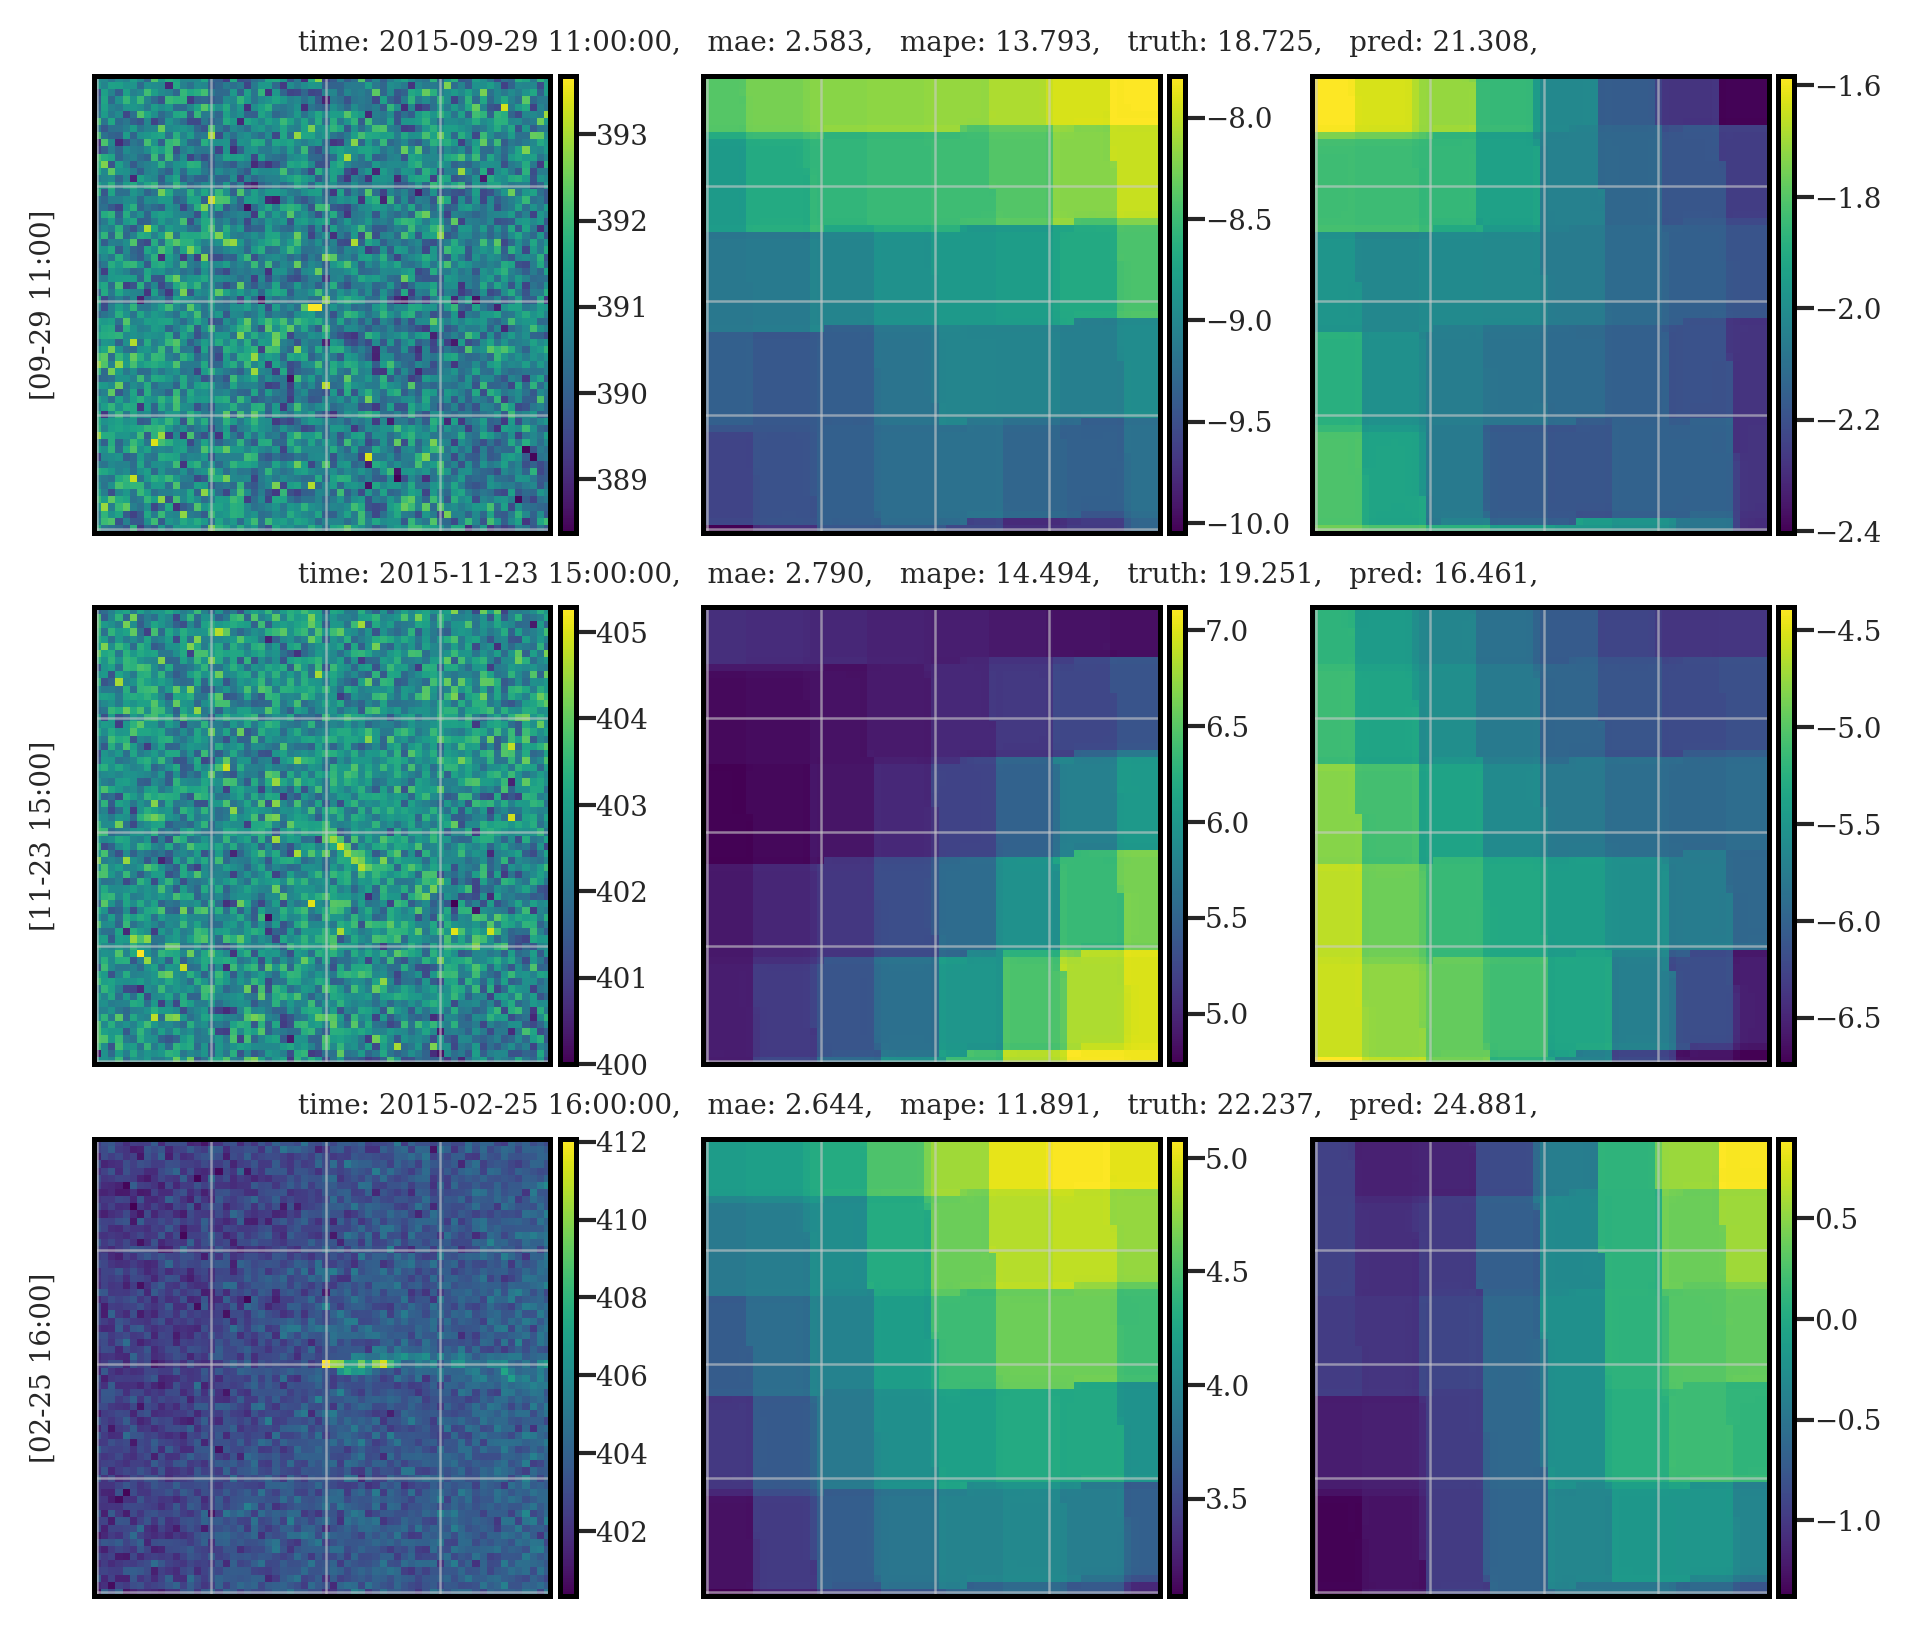

In [14]:
model_eval.plot_inversion_examples(data, metrics["mae"], metrics["mape"], model)